In [1]:
from dataset import INFS4203Dataset
import seaborn as sns
import matplotlib.pyplot as plt
dataset = INFS4203Dataset('train.csv', preprocessing=True)

In [2]:

import pandas as pd
from utils import get_data_dir

test = pd.read_csv(get_data_dir() /  'test.csv')


#Check NaN counts
test.isna().sum()



Num_Col_0      0
Num_Col_1      0
Num_Col_2      0
Num_Col_3      0
Num_Col_4      0
              ..
Cat_Col_123    0
Cat_Col_124    0
Cat_Col_125    0
Cat_Col_126    0
Cat_Col_127    0
Length: 128, dtype: int64

/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/larsmoan/Documents/UQ/INFS4203/infs4203/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='Num_Col_13', ylabel='Num_Col_72'>

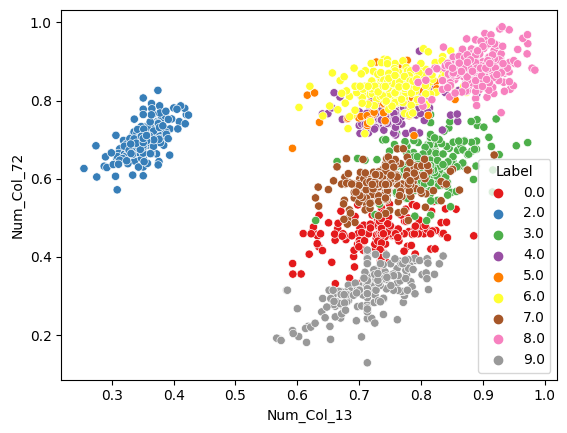

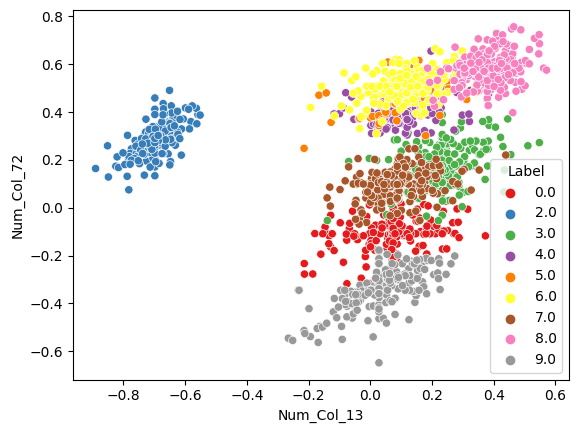

In [3]:
#Only plot the entries where the label is not 1
plt.figure()
sns.scatterplot(x='Num_Col_13', y='Num_Col_72', hue='Label', data=dataset.cleaned_df[dataset.cleaned_df['Label']!=1], legend='full', hue_norm=(0,10), palette='Set1')
plt.figure()
sns.scatterplot(x='Num_Col_13', y='Num_Col_72', hue='Label', data=dataset.min_max_normalized_df[dataset.min_max_normalized_df['Label']!=1], legend='full', hue_norm=(0,10), palette='Set1')


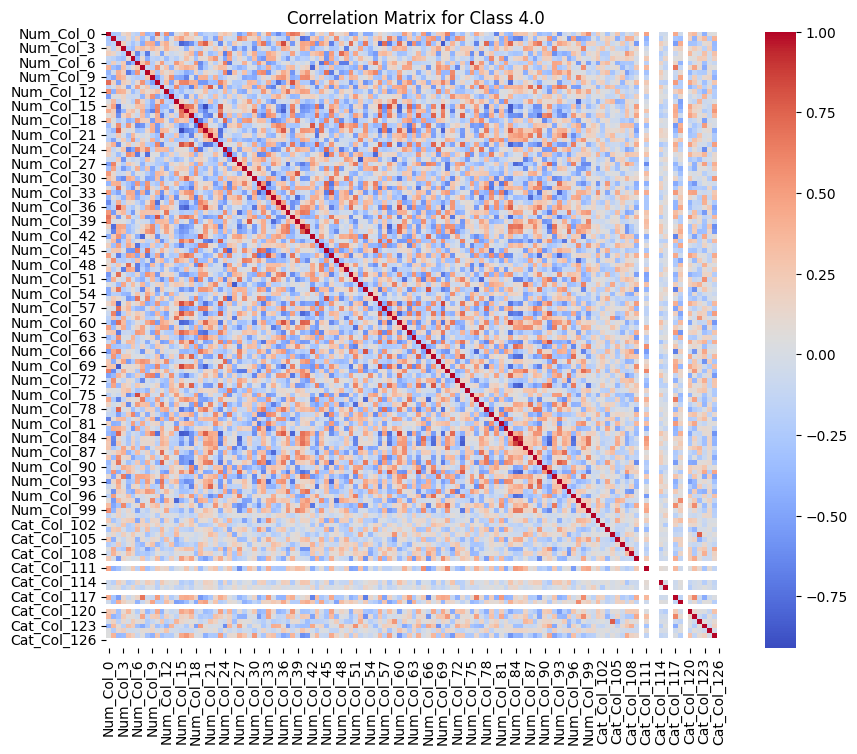

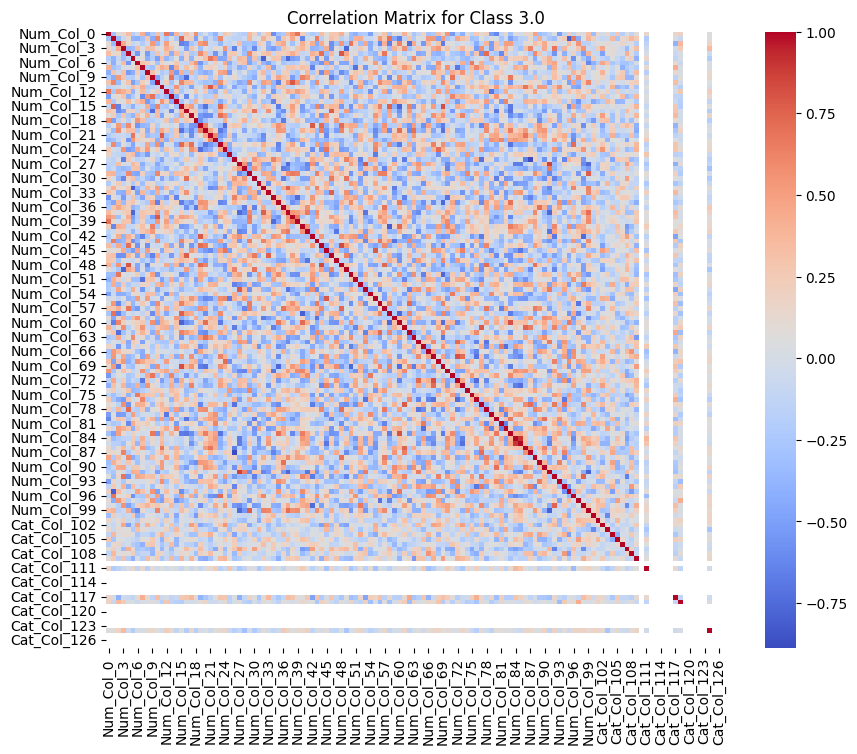

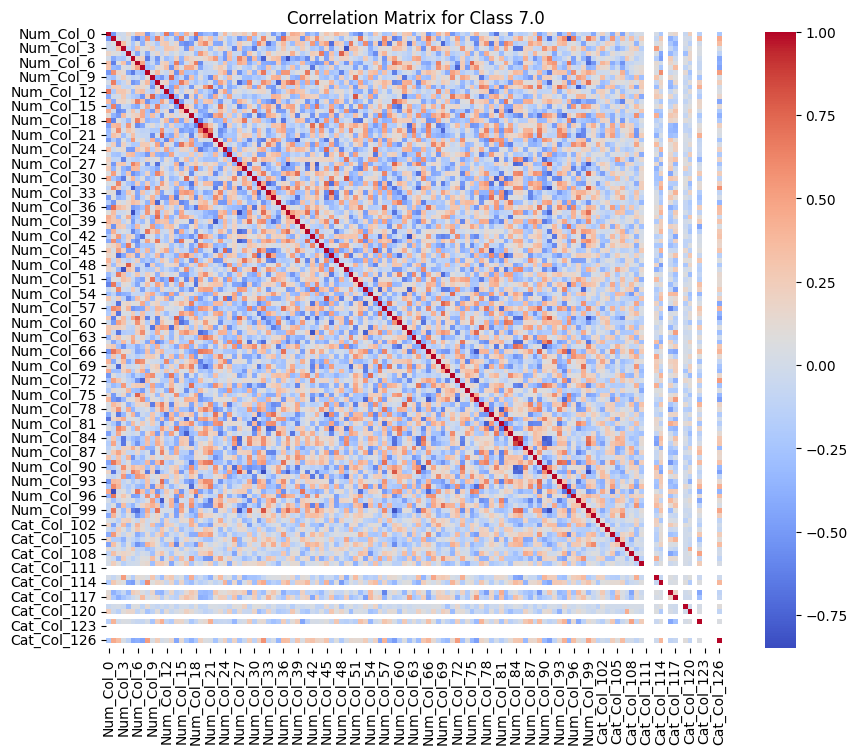

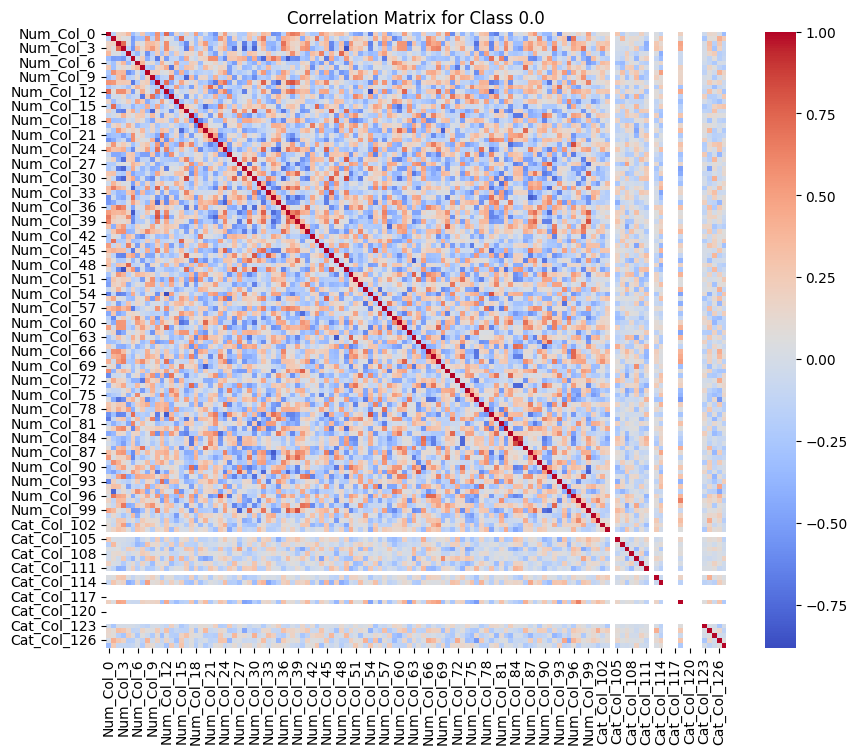

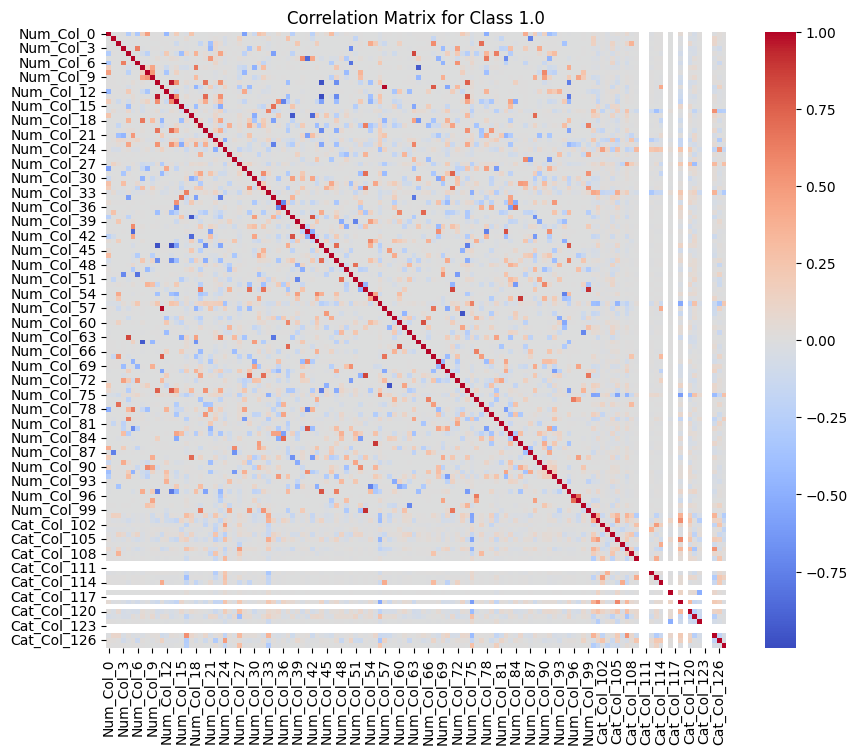

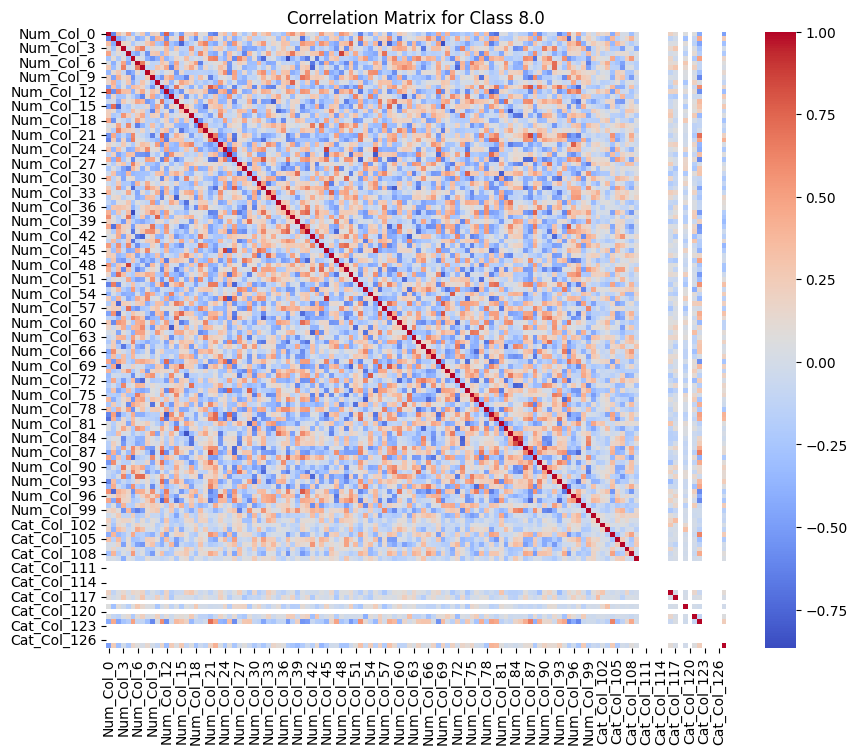

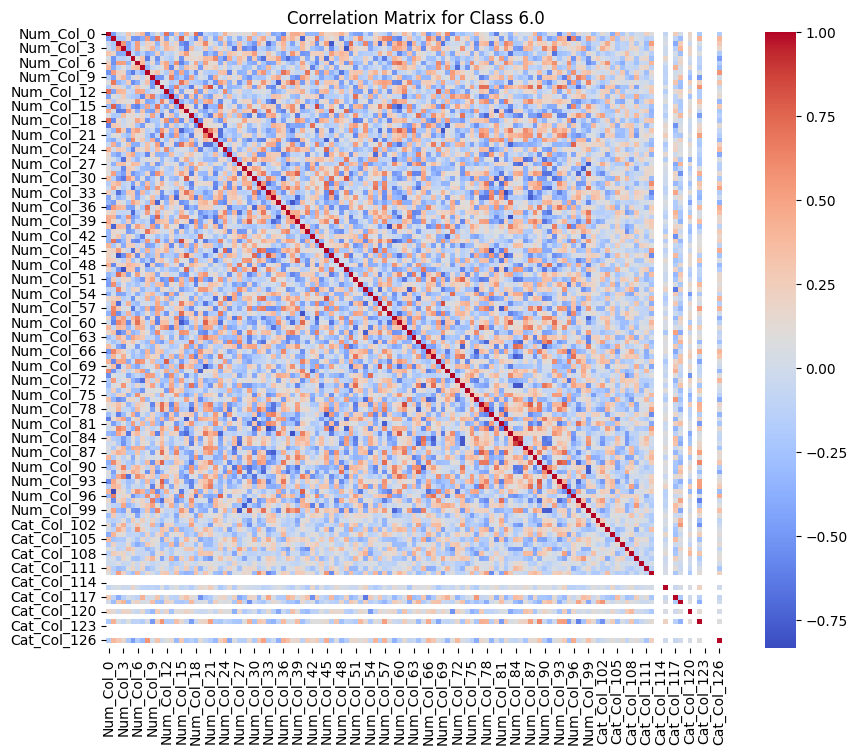

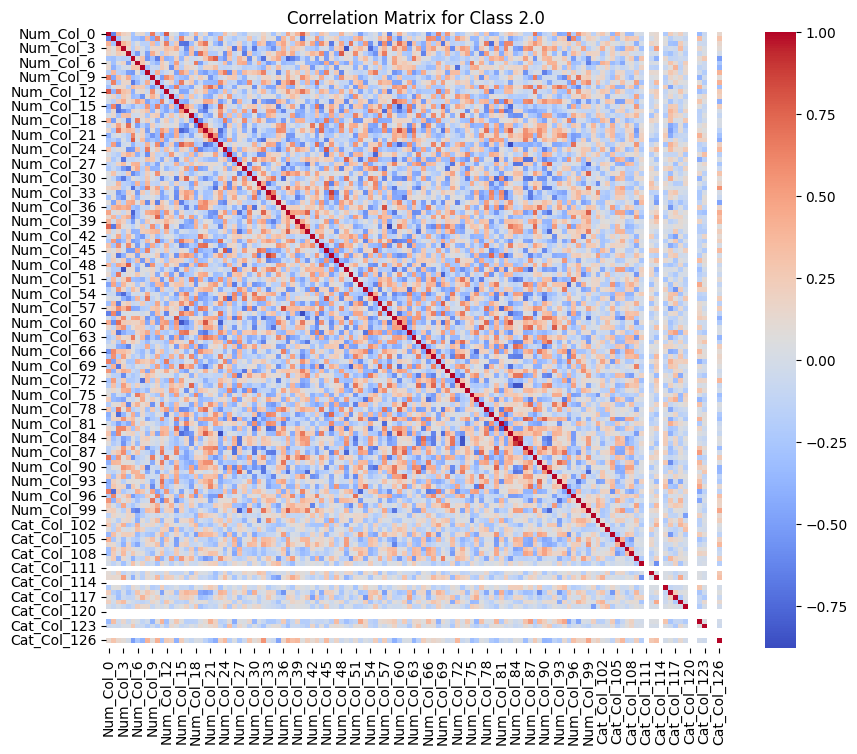

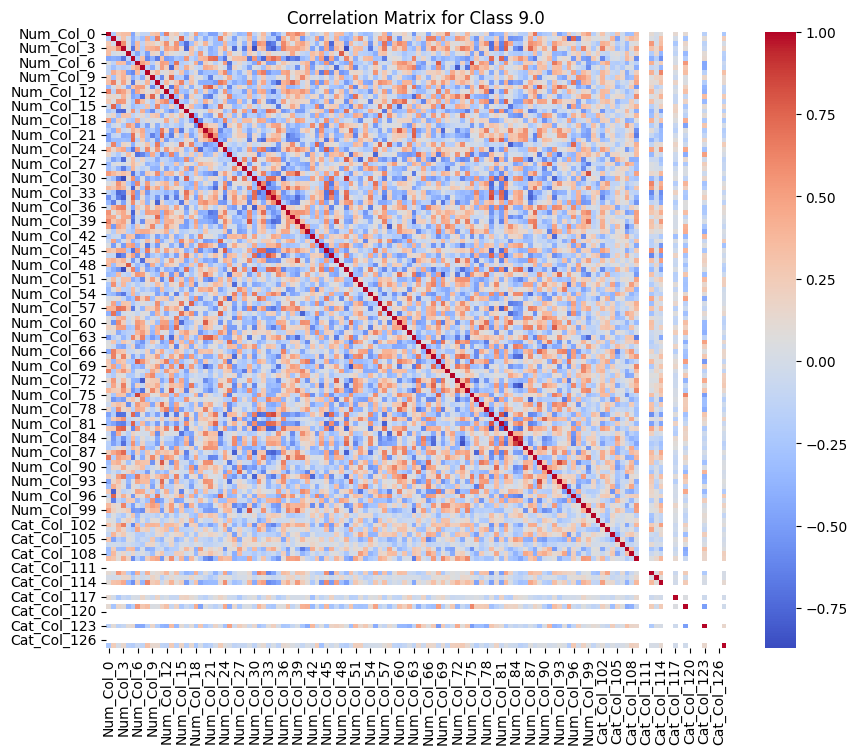

In [4]:
dset = INFS4203Dataset('train.csv', preprocessing=True)
X = dset.df[dset.feature_columns]
y = dset.df['Label']

unique_labels = y.unique()

correlation_matrices = {}

for label in unique_labels:
    # Subset data for the current class
    subset = X[y == label]
    
    # Compute correlation matrix for the subset
    correlation = subset.corr()
    
    # Store in the dictionary
    correlation_matrices[label] = correlation

# Access correlation matrix for a specific class label
# print(correlation_matrices[some_class_label])


import seaborn as sns
import matplotlib.pyplot as plt


for i in range(0,9):
    label_to_visualize = unique_labels[i]  # change to the label you want to visualize
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrices[label_to_visualize], annot=False, cmap='coolwarm')
    plt.title(f"Correlation Matrix for Class {label_to_visualize}")
    plt.show()

In [5]:
from dataset import INFS4203Dataset
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from utils import print_terminal_histogram
from itertools import combinations


# The dataset preprocessed
dset = INFS4203Dataset('train.csv', preprocessing=True)
data = dset.min_max_normalized_df

X = data[data.columns[:-1]]
y = data['Label']

knn = KNeighborsClassifier()

results = []

feature_combinations = combinations(range(X.shape[1]), 2)

for combo in feature_combinations:
    X_subset = X.iloc[:, list(combo)]

    scores = cross_val_score(knn, X_subset, y, cv=10, scoring='accuracy')
    mean_score = scores.mean()
    results.append((combo, mean_score))

sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

best_combo, best_score = sorted_results[0]
print(f"Best feature pair: {best_combo}, with CV Accuracy: {best_score:.4f}")

ImportError: cannot import name 'print_terminal_histogram' from 'utils' (/Users/larsmoan/Documents/UQ/INFS4203/infs4203/infs4203/utils.py)